In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from RNN_model import Simple_RNN
import utils_2 as ut2



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file7_080124.mat"
cutoff = [8/1000, 11/1000]

mat = ds.MatFileToDataFrame(fpath, fname)

df_ = mat.get_dataframe(cutoff)

x = dc.CaractDefect(df_)
taus = x.get_tau()[1]

hilbert, _ = x.get_hilbert()

df = pd.merge(df_, hilbert, on = 'Hilbert Transform', how = 'outer')

df.head()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,0.134180,0.023473,0.002203,0.002203-0.001490j,0.002659,-0.594742,-0.051439
1,0.135824,0.025117,0.002051,0.002051+0.000170j,0.002058,0.082612,-0.020024
2,0.136482,0.025775,0.001900,0.001900+0.000303j,0.001924,0.158163,0.009547
3,0.137797,0.027090,0.001749,0.001749+0.000903j,0.001969,0.476669,0.035605
4,0.137797,0.027090,0.001599,0.001599+0.000993j,0.001882,0.555726,0.056848


In [3]:
amplitudes = df['Amplitude'][300:10000].values
scale = MinMaxScaler(feature_range=(-1, 1))
amplitudes = scale.fit_transform(amplitudes.reshape(-1, 1))
#amplitudes = amplitudes.reshape(-1,1)
amplitudes.shape


(9700, 1)

### **prepare data**

In [4]:
amplitudes = df['Amplitude'][300:50000].values
scale = MinMaxScaler(feature_range=(-1, 1))
amplitudes = scale.fit_transform(amplitudes.reshape(-1, 1))
#amplitudes = amplitudes.reshape(-1,1)
amplitudes.shape

(49700, 1)

In [5]:
x,y = ut2.create_data(amplitudes, 1000)
x_train, y_train, x_test, y_test = ut2.split_data(x, y, 0.7)

print('shape of x_train, x_test, y_train, y_test:',)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

shape of x_train, x_test, y_train, y_test:


((34090, 1000, 1), (14610, 1000, 1), (34090, 1), (14610, 1))

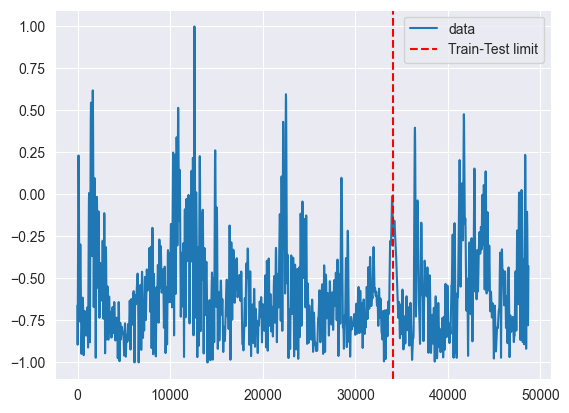

In [6]:
plt.plot(np.vstack((y_train,y_test)))
plt.axvline(int(len(x)*0.7), color = 'r', linestyle = '--')
plt.legend(['data', 'Train-Test limit'])
plt.show()

In [7]:
#tensores
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

## **rolling window prediction**

In [8]:
in_size = x.shape[-1]
out_size = in_size
hid_size = 3
num_layers = 1


model = Simple_RNN(in_size, hid_size, out_size, num_layers)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [9]:
train_loss, test_loss = ut2.simpleTrain_model(model,
               criterion,
               optimizer,
               x_train,
               x_test,
               y_train,
               y_test,
               epochs=100)

  5%|▌         | 5/100 [00:32<10:12,  6.44s/it]

Epoch :0.05    Train Loss :0.579748272895813    Test Loss :0.5086320042610168


 10%|█         | 10/100 [01:04<09:42,  6.47s/it]

Epoch :0.1    Train Loss :0.3481115698814392    Test Loss :0.2941577136516571


 15%|█▌        | 15/100 [01:36<08:50,  6.25s/it]

Epoch :0.15    Train Loss :0.18226666748523712    Test Loss :0.15265843272209167


 20%|██        | 20/100 [02:07<08:20,  6.25s/it]

Epoch :0.2    Train Loss :0.09950359910726547    Test Loss :0.08941195905208588


 25%|██▌       | 25/100 [02:38<07:53,  6.31s/it]

Epoch :0.25    Train Loss :0.07398286461830139    Test Loss :0.07595688849687576


 30%|███       | 30/100 [03:10<07:22,  6.33s/it]

Epoch :0.3    Train Loss :0.07582718878984451    Test Loss :0.08252611756324768


 35%|███▌      | 35/100 [03:42<06:55,  6.39s/it]

Epoch :0.35    Train Loss :0.08001840859651566    Test Loss :0.08627893030643463


 40%|████      | 40/100 [04:14<06:27,  6.46s/it]

Epoch :0.4    Train Loss :0.07697772979736328    Test Loss :0.0814833715558052


 45%|████▌     | 45/100 [04:44<05:33,  6.07s/it]

Epoch :0.45    Train Loss :0.0708734467625618    Test Loss :0.07422885298728943


 50%|█████     | 50/100 [05:14<05:02,  6.05s/it]

Epoch :0.5    Train Loss :0.06713519990444183    Test Loss :0.06977228075265884


 55%|█████▌    | 55/100 [05:44<04:28,  5.97s/it]

Epoch :0.55    Train Loss :0.06590007245540619    Test Loss :0.06781666725873947


 60%|██████    | 60/100 [06:14<03:56,  5.91s/it]

Epoch :0.6    Train Loss :0.06446672976016998    Test Loss :0.06590306758880615


 65%|██████▌   | 65/100 [06:43<03:28,  5.96s/it]

Epoch :0.65    Train Loss :0.061703551560640335    Test Loss :0.06326298415660858


 70%|███████   | 70/100 [07:14<03:01,  6.06s/it]

Epoch :0.7    Train Loss :0.05841551721096039    Test Loss :0.06045140326023102


 75%|███████▌  | 75/100 [07:44<02:30,  6.02s/it]

Epoch :0.75    Train Loss :0.05509718880057335    Test Loss :0.05736346170306206


 80%|████████  | 80/100 [08:15<02:06,  6.31s/it]

Epoch :0.8    Train Loss :0.051370203495025635    Test Loss :0.05339255928993225


 85%|████████▌ | 85/100 [08:47<01:36,  6.41s/it]

Epoch :0.85    Train Loss :0.04712292179465294    Test Loss :0.04864680394530296


 90%|█████████ | 90/100 [09:18<01:02,  6.23s/it]

Epoch :0.9    Train Loss :0.04258053004741669    Test Loss :0.043591659516096115


 95%|█████████▌| 95/100 [09:49<00:30,  6.14s/it]

Epoch :0.95    Train Loss :0.03762262314558029    Test Loss :0.03823751583695412


100%|██████████| 100/100 [1:21:37<00:00, 48.97s/it] 

Epoch :1.0    Train Loss :0.03217052295804024    Test Loss :0.03249566629528999


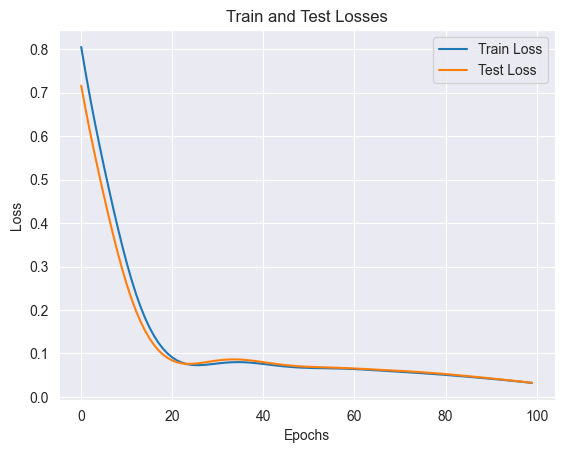

In [10]:
# Plot train and test losses
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()

In [12]:
'''print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

all_test_pred = []

with torch.no_grad():
    model.eval()
    for elem in tqdm(x_test[:10]):
        elem = elem.view(1000)
        test_aux = []
        count = 0
        while count < 50:
                pred = model(elem.view(1,1000,1))
                test_aux.append(pred[0,0].item())
                #print(elem.shape, pred.shape)
                elem = torch.cat((elem[1:], pred[0]))
                count += 1

        all_test_pred.append(test_aux)'''


'print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)\n\nall_test_pred = []\n\nwith torch.no_grad():\n    model.eval()\n    for elem in tqdm(x_test[:10]):\n        elem = elem.view(1000)\n        test_aux = []\n        count = 0\n        while count < 50:\n                pred = model(elem.view(1,1000,1))\n                test_aux.append(pred[0,0].item())\n                #print(elem.shape, pred.shape)\n                elem = torch.cat((elem[1:], pred[0]))\n                count += 1\n\n        all_test_pred.append(test_aux)'

### **prediction**

In [11]:
# rolling window prediction
test_pred = ut2.rollingWindowPrediction(model, x_train[:10])

100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


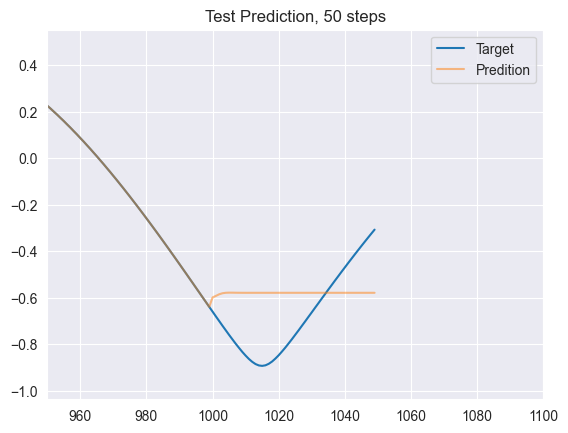

In [12]:

plt.plot(np.vstack((x_train[0].detach().numpy(),y_train[:50].detach().numpy())),label='Target') 
plt.plot(np.vstack((x_train[0].view(1000,1), np.asanyarray(test_pred[0]).reshape(50,1))),label='Predition', alpha = 0.5) 

#plt.plot(y_test[], label = 'Target')
#plt.plot(all_test_pred[0], label = 'Prediction')
plt.xlim(950,1100)
plt.legend()
plt.title('Test Prediction, 50 steps')
plt.show()

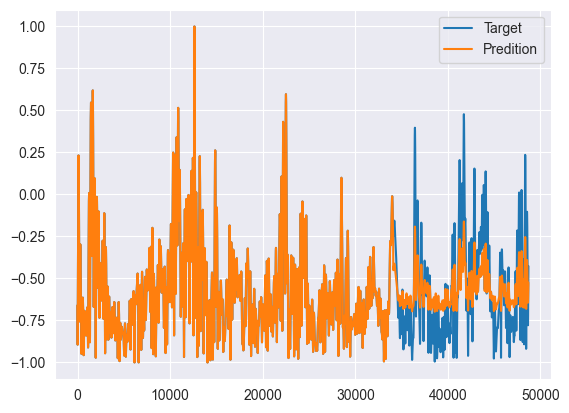

In [13]:
#single step prediction
plt.plot(np.vstack((y_train.detach().numpy(),y_test.detach().numpy())),label='Target') 
plt.plot(np.vstack((y_train.detach().numpy(),model(x_test).detach().numpy())),label='Predition') 
#plt.axvline(int(len(x)*0.8)) 
plt.legend()
plt.show()

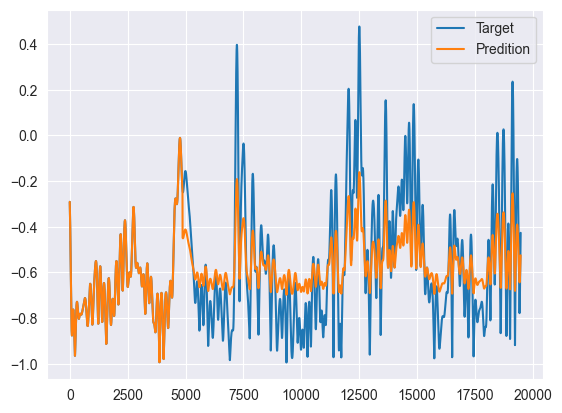

In [14]:
plt.plot(np.vstack((y_train.detach().numpy(),y_test.detach().numpy()))[int(len(x)*0.6):],label='Target') 
plt.plot(np.vstack((y_train.detach().numpy(),model(x_test).detach().numpy()))[int(len(x)*0.6):],label='Predition')
plt.title('')
#plt.axvline(int(len(x)*0.8)) 
plt.legend()
plt.show()

#### **second training**

In [16]:
train_loss2, test_loss2 = ut2.simpleTrain_model(model,
               criterion,
               optimizer,
               x_train,
               x_test,
               y_train,
               y_test,
               epochs=200)

  2%|▎         | 5/200 [00:31<20:09,  6.20s/it]

Epoch :0.025    Train Loss :0.026417387649416924    Test Loss :0.026330750435590744


  5%|▌         | 10/200 [01:03<20:15,  6.39s/it]

Epoch :0.05    Train Loss :0.020504586398601532    Test Loss :0.019847385585308075


  8%|▊         | 15/200 [01:37<20:38,  6.69s/it]

Epoch :0.075    Train Loss :0.01475925650447607    Test Loss :0.01360493153333664


 10%|█         | 20/200 [02:10<19:46,  6.59s/it]

Epoch :0.1    Train Loss :0.009605323895812035    Test Loss :0.008174740709364414


 12%|█▎        | 25/200 [02:42<18:38,  6.39s/it]

Epoch :0.125    Train Loss :0.005583108402788639    Test Loss :0.0041084191761910915


 15%|█▌        | 30/200 [03:14<17:46,  6.27s/it]

Epoch :0.15    Train Loss :0.003090929239988327    Test Loss :0.001835809089243412


 18%|█▊        | 35/200 [03:45<17:34,  6.39s/it]

Epoch :0.175    Train Loss :0.00210608565248549    Test Loss :0.0011847985442727804


 20%|██        | 40/200 [04:17<16:47,  6.30s/it]

Epoch :0.2    Train Loss :0.0020466891583055258    Test Loss :0.0013720315182581544


 22%|██▎       | 45/200 [04:48<16:19,  6.32s/it]

Epoch :0.225    Train Loss :0.0021438763942569494    Test Loss :0.0015513850376009941


 25%|██▌       | 50/200 [05:20<15:38,  6.25s/it]

Epoch :0.25    Train Loss :0.0020239590667188168    Test Loss :0.0014009377919137478


 28%|██▊       | 55/200 [15:29<5:08:27, 127.64s/it]

Epoch :0.275    Train Loss :0.0017711954424157739    Test Loss :0.0011246061185374856


 30%|███       | 60/200 [16:02<1:02:52, 26.94s/it] 

Epoch :0.3    Train Loss :0.0015583557542413473    Test Loss :0.0009016459807753563


 32%|███▎      | 65/200 [16:34<22:02,  9.80s/it]  

Epoch :0.325    Train Loss :0.00143327284604311    Test Loss :0.0007844861247576773


 35%|███▌      | 70/200 [17:05<14:53,  6.88s/it]

Epoch :0.35    Train Loss :0.0013574124313890934    Test Loss :0.0007255864911712706


 38%|███▊      | 75/200 [17:37<13:15,  6.36s/it]

Epoch :0.375    Train Loss :0.0012898774584755301    Test Loss :0.0006793543579988182


 40%|████      | 80/200 [18:08<12:40,  6.34s/it]

Epoch :0.4    Train Loss :0.001217329758219421    Test Loss :0.0006365888984873891


 42%|████▎     | 85/200 [18:40<12:14,  6.38s/it]

Epoch :0.425    Train Loss :0.001144537702202797    Test Loss :0.0005965782911516726


 45%|████▌     | 90/200 [19:12<11:40,  6.36s/it]

Epoch :0.45    Train Loss :0.0010782665340229869    Test Loss :0.0005640847375616431


 48%|████▊     | 95/200 [19:44<11:08,  6.37s/it]

Epoch :0.475    Train Loss :0.001020036987029016    Test Loss :0.000536531675606966


 50%|█████     | 100/200 [20:16<10:36,  6.37s/it]

Epoch :0.5    Train Loss :0.0009675431647337973    Test Loss :0.000509211327880621


 52%|█████▎    | 105/200 [20:48<10:07,  6.39s/it]

Epoch :0.525    Train Loss :0.0009184324298985302    Test Loss :0.00048105226596817374


 55%|█████▌    | 110/200 [21:20<09:29,  6.32s/it]

Epoch :0.55    Train Loss :0.0008719459292478859    Test Loss :0.0004516769549809396


 57%|█████▊    | 115/200 [21:51<08:58,  6.33s/it]

Epoch :0.575    Train Loss :0.0008282850030809641    Test Loss :0.0004235290689393878


 60%|██████    | 120/200 [22:23<08:26,  6.33s/it]

Epoch :0.6    Train Loss :0.0007875973242335021    Test Loss :0.0003974195569753647


 62%|██████▎   | 125/200 [22:55<08:09,  6.53s/it]

Epoch :0.625    Train Loss :0.0007496774196624756    Test Loss :0.00037385939504019916


 65%|██████▌   | 130/200 [23:28<07:30,  6.43s/it]

Epoch :0.65    Train Loss :0.0007141914684325457    Test Loss :0.0003527027147356421


 68%|██████▊   | 135/200 [23:59<06:51,  6.32s/it]

Epoch :0.675    Train Loss :0.0006808929610997438    Test Loss :0.0003334510838612914


 70%|███████   | 140/200 [24:31<06:16,  6.28s/it]

Epoch :0.7    Train Loss :0.0006496374262496829    Test Loss :0.0003158592735417187


 72%|███████▎  | 145/200 [34:53<1:01:28, 67.06s/it] 

Epoch :0.725    Train Loss :0.0006203078664839268    Test Loss :0.00029943278059363365


 75%|███████▌  | 150/200 [35:25<13:56, 16.73s/it]  

Epoch :0.75    Train Loss :0.0005927728489041328    Test Loss :0.00028400286100804806


 78%|███████▊  | 155/200 [35:57<06:07,  8.16s/it]

Epoch :0.775    Train Loss :0.000566895236261189    Test Loss :0.0002693530113901943


 80%|████████  | 160/200 [36:29<04:27,  6.68s/it]

Epoch :0.8    Train Loss :0.0005425519775599241    Test Loss :0.0002554784878157079


 82%|████████▎ | 165/200 [37:00<03:41,  6.33s/it]

Epoch :0.825    Train Loss :0.0005196369020268321    Test Loss :0.00024238339392468333


 85%|████████▌ | 170/200 [37:32<03:10,  6.33s/it]

Epoch :0.85    Train Loss :0.0004980546655133367    Test Loss :0.0002300883352290839


 88%|████████▊ | 175/200 [38:03<02:32,  6.11s/it]

Epoch :0.875    Train Loss :0.0004777147260028869    Test Loss :0.00021859662956558168


 90%|█████████ | 180/200 [38:33<02:01,  6.09s/it]

Epoch :0.9    Train Loss :0.00045853282790631056    Test Loss :0.00020785735978279263


 92%|█████████▎| 185/200 [39:03<01:30,  6.05s/it]

Epoch :0.925    Train Loss :0.00044043021625839174    Test Loss :0.0001978229993255809


 95%|█████████▌| 190/200 [39:34<01:01,  6.15s/it]

Epoch :0.95    Train Loss :0.0004233349463902414    Test Loss :0.00018841274140868336


 98%|█████████▊| 195/200 [40:05<00:30,  6.15s/it]

Epoch :0.975    Train Loss :0.00040718077798373997    Test Loss :0.0001795729185687378


100%|██████████| 200/200 [40:35<00:00, 12.18s/it]

Epoch :1.0    Train Loss :0.00039190606912598014    Test Loss :0.0001712452358333394


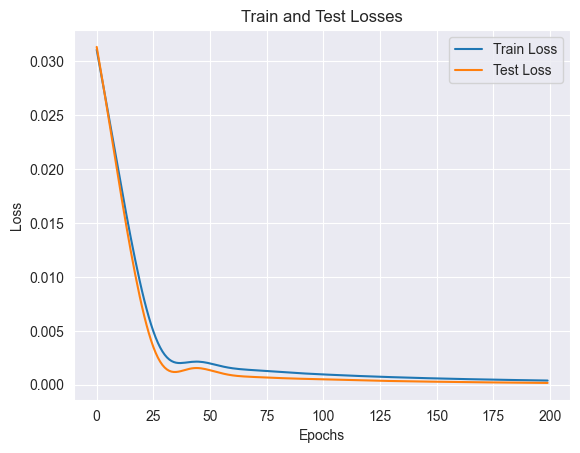

In [17]:
plt.plot(train_loss2, label='Train Loss')
plt.plot(test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()

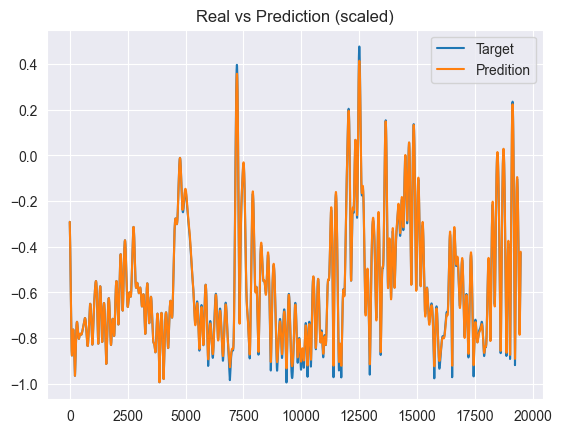

In [18]:
plt.plot(np.vstack((y_train.detach().numpy(),y_test.detach().numpy()))[int(len(x)*0.6):],label='Target') 
plt.plot(np.vstack((y_train.detach().numpy(),model(x_test).detach().numpy()))[int(len(x)*0.6):],label='Predition')
plt.title('Real vs Prediction (scaled)')
#plt.axvline(int(len(x)*0.8)) 
plt.legend()
plt.show()

In [19]:
#de-scaled data

aux = np.vstack((y_train.detach().numpy(),y_test.detach().numpy()))
aux2 = np.vstack((y_train.detach().numpy(),model(x_test).detach().numpy()))
dtransform_real = scale.inverse_transform(aux)
dtransform_pred = scale.inverse_transform(aux2)


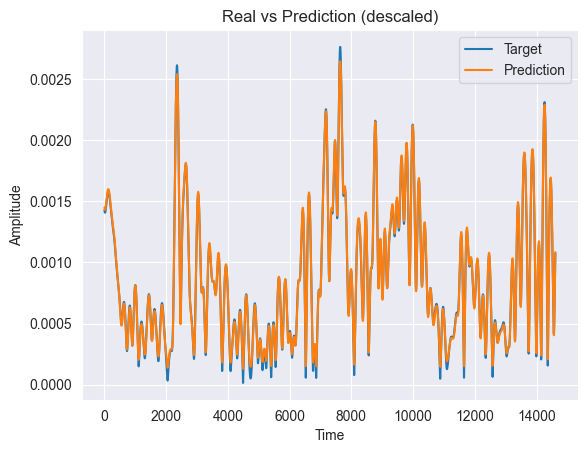

In [20]:
plt.plot(dtransform_real[int(len(x)*0.7):], label='Target')
plt.plot(dtransform_pred[int(len(x)*0.7):], label='Prediction')
plt.title('Real vs Prediction (descaled)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## **multistep**

### **data**

In [5]:
x,y = ut2.create_data(amplitudes, 1000, output_dim = 50)

In [6]:
#x,y = ut2.create_data(amplitudes, 1000, output_dim = 50)
x_train, y_train, x_test, y_test = ut2.split_data(x, y, 0.7)

print('shape of x_train, x_test, y_train, y_test:',)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

shape of x_train, x_test, y_train, y_test:


((34055, 1000, 1), (14595, 1000, 1), (34055, 50, 1), (14595, 50, 1))

In [7]:
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

### **red**

In [8]:

class Simple_RNN(nn.Module):
    def __init__(self, in_dim, hid_dim, out_dim, num_layers):
        super().__init__()
        
        # define the dimensions
        self.in_dim = in_dim
        self.hid_dim = hid_dim
        self.out_dim = out_dim
        self.layer = num_layers
        
        # define the rnn layer
        self.rnn = nn.RNN(self.in_dim, self.hid_dim, self.layer, nonlinearity='tanh', batch_first=True)
        
        # define fully connected layer for output
        self.fc = nn.Linear(self.hid_dim, self.out_dim)
        
    def forward(self,x):
        
        # initialize the hidden layer
        h0 = torch.zeros(self.layer, x.size(0),self.hid_dim)
        
        #initialize the rnn
        out, _ = self.rnn(x,h0)
        
        # pass through fully connected layer
        out = self.fc(out[:,-1,:])  # No need to select only the last output
        
        return out

In [9]:
# red
in_size = 1
out_size = 50
hid_size = 10
num_layers = 2


model = Simple_RNN(in_size, hid_size, out_size, num_layers)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [10]:
train_loss, test_loss = ut2.train_model(model,
               criterion,
               optimizer,
               x_train,
               x_test,
               y_train,
               y_test,
               epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([34055, 1000, 50])


c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34055, 50, 1])) that is different to the input size (torch.Size([34055, 1000, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 0/100 [01:01<?, ?it/s]


RuntimeError: The size of tensor a (1000) must match the size of tensor b (50) at non-singleton dimension 1

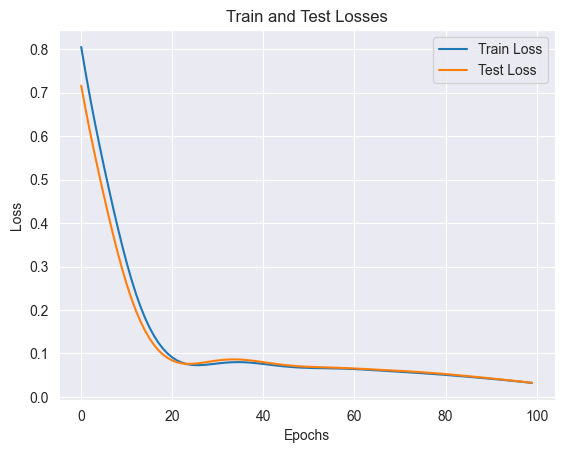

In [28]:
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()